#Correlation Matrix with Categorical Variables

In [1]:
!pip install dython --quiet

In [10]:
import pandas as pd
from dython.nominal import associations

import warnings
warnings.filterwarnings('ignore')


In [3]:
!wget https://raw.githubusercontent.com/adamerose/datasets/master/pokemon.csv

--2023-11-28 08:54:35--  https://raw.githubusercontent.com/adamerose/datasets/master/pokemon.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44028 (43K) [text/plain]
Saving to: ‘pokemon.csv’

pokemon.csv         100%[===================>]  43.00K  --.-KB/s    in 0.01s   

2023-11-28 08:54:35 (3.75 MB/s) - ‘pokemon.csv’ saved [44028/44028]



In [11]:
df= pd.read_csv('pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


We can use the function identify_nominal_columns(dataset) of the dython library to identify the categorical variables in the dataset.

In [12]:
from dython.nominal import identify_nominal_columns

categorical_features=identify_nominal_columns(df)
categorical_features

['Name', 'Type 1', 'Type 2']

associations function returns a dictionary that contains:
- ‘corr’ as key : A DataFrame of the correlation between all features.
- ‘ax’ as value: A matplotlib axe which contains the correlation heatmap.

Firstly, Let’s find the correlation matrix for the whole pokemon dataset.

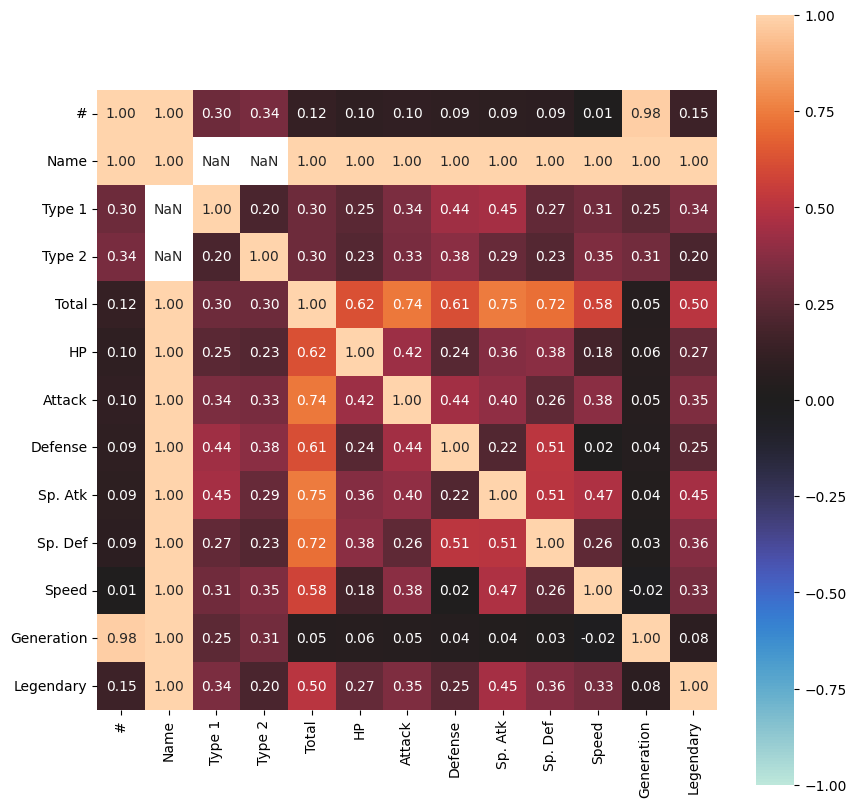

In [13]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(10,10))

In [14]:
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all')\
                                            .style.background_gradient(cmap='coolwarm', axis=None)\
                                            .set_precision(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.00,1.00,0.30,0.34,0.12,0.10,0.10,0.09,0.09,0.09,0.01,0.98,0.15
Name,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Type 1,0.30,0.00,1.00,0.20,0.30,0.25,0.34,0.44,0.45,0.27,0.31,0.25,0.34
Type 2,0.34,0.00,0.20,1.00,0.30,0.23,0.33,0.38,0.29,0.23,0.35,0.31,0.20
Total,0.12,1.00,0.30,0.30,1.00,0.62,0.74,0.61,0.75,0.72,0.58,0.05,0.50
HP,0.10,1.00,0.25,0.23,0.62,1.00,0.42,0.24,0.36,0.38,0.18,0.06,0.27
Attack,0.10,1.00,0.34,0.33,0.74,0.42,1.00,0.44,0.40,0.26,0.38,0.05,0.35
Defense,0.09,1.00,0.44,0.38,0.61,0.24,0.44,1.00,0.22,0.51,0.02,0.04,0.25
Sp. Atk,0.09,1.00,0.45,0.29,0.75,0.36,0.40,0.22,1.00,0.51,0.47,0.04,0.45
Sp. Def,0.09,1.00,0.27,0.23,0.72,0.38,0.26,0.51,0.51,1.00,0.26,0.03,0.36


## Correlation Matrix of Categorical Variables Only.

In [15]:
selected_column= df[categorical_features]
categorical_df = selected_column.copy()
categorical_df

,Name,Type 1,Type 2
0,Bulbasaur,Grass,Poison
1,Ivysaur,Grass,Poison
2,Venusaur,Grass,Poison
3,VenusaurMega Venusaur,Grass,Poison
4,Charmander,Fire,NaN
...,...,...,...
795,Diancie,Rock,Fairy
796,DiancieMega Diancie,Rock,Fairy
797,HoopaHoopa Confined,Psychic,Ghost
798,HoopaHoopa Unbound,Psychic,Dark


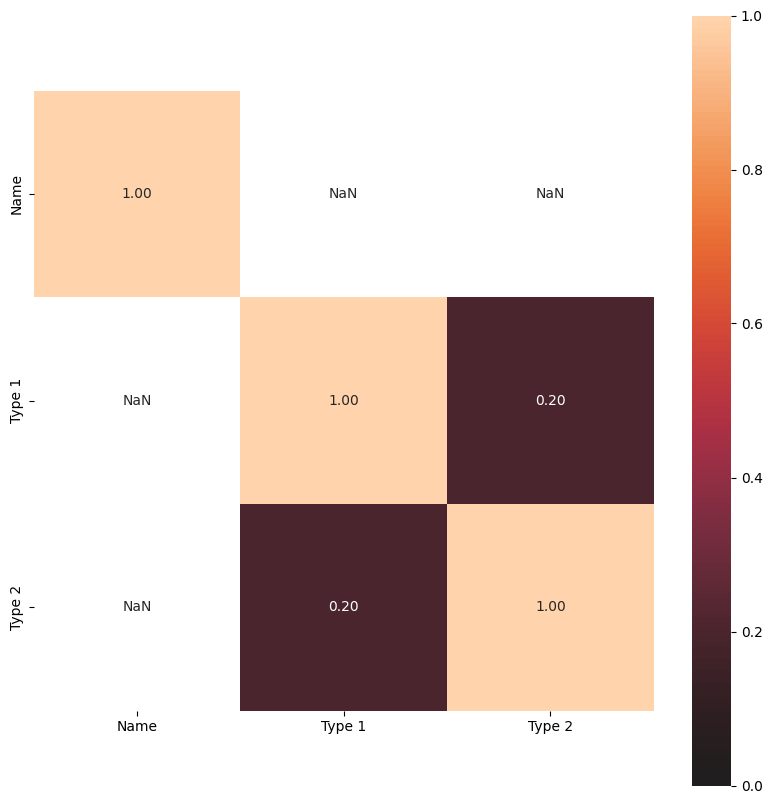

In [16]:
categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))